In [1]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
from collections import defaultdict
import demes, demesdraw, matplotlib.pylab as plt

import model, slice, get_LD, plot_LD

### With migration (default)

[Split(parent='Ancestral', children=['Split_01', 'Split_02', 'Split_00'], time=12000.0), Split(parent='Merge_1', children=['Split_10', 'Split_11', 'Split_12'], time=6000.0)]


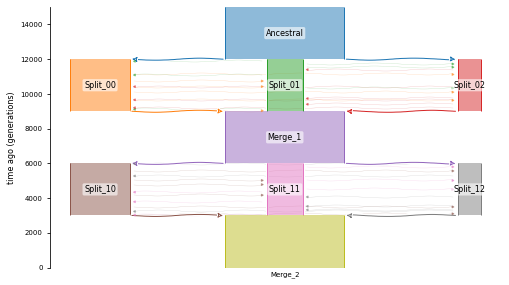

In [39]:
# Create symmetric model
N = 30e3
time_period = 0.1*N
cake = model.cake_model(Ns=[N,N,N],splits = [3,2],proportions=[[1/2,0.3,0.2],[1/2,0.3,0.2]],time_period_merge=[time_period,time_period,N],time_period_splits=[0.5*N,N],yaml_filename="../yaml_files/nonsymmetric_3tier_503020.yaml",plot_filename="../Figures/nonsymmetric_cake/nonsymmetric_3tier_503020")

In [40]:
# Slice
times,times_dic = slice.sample_timepoints(cake)
sliced_dict = slice.slice_timepoints(cake,times,yaml_filename="../yaml_files/nonsymmetric_3tier_503020")

In [41]:
# Compute LD
LD_dict = get_LD.get_LD_from_sliced_demes(sliced_dict)

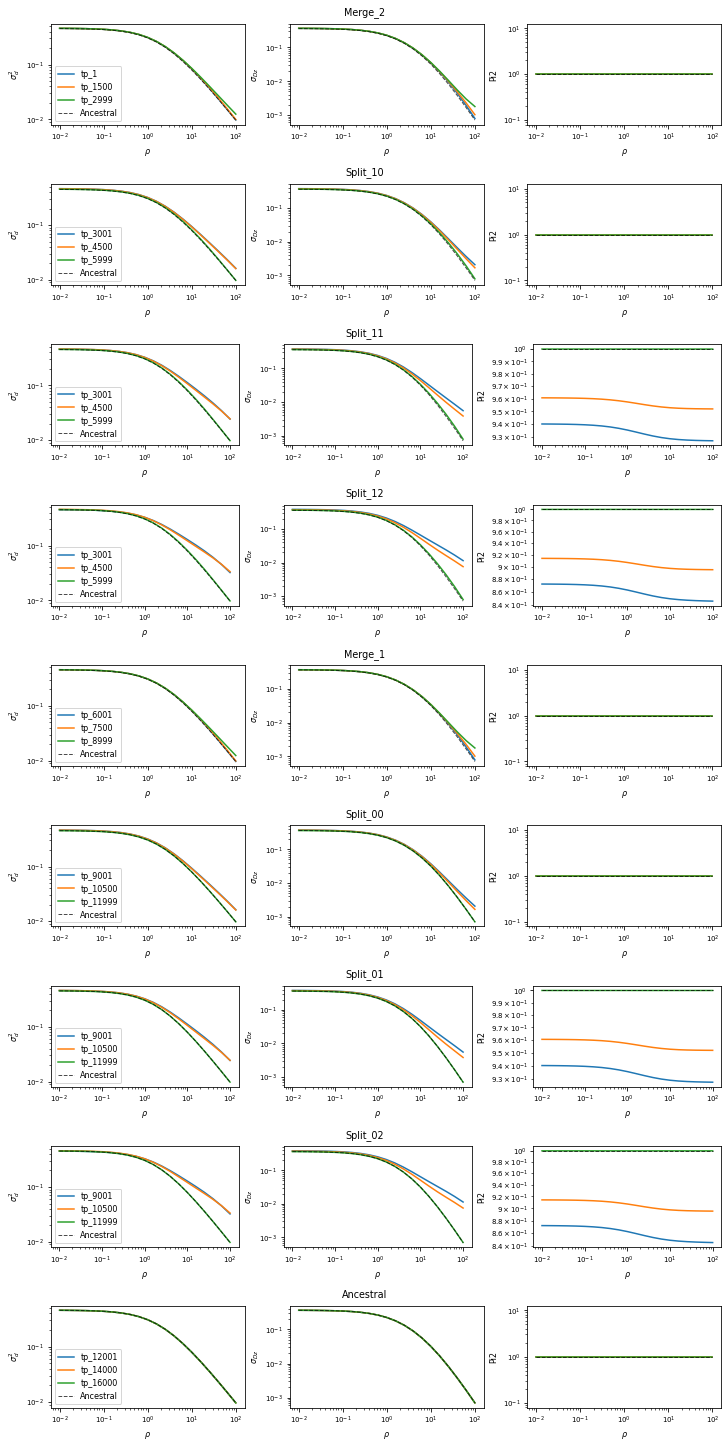

In [42]:
# Plot LD
rhos = np.logspace(-2, 2, 21)
plot_LD.plot_LD(LD_dict,times_dic,LD_dict['Ancestral'][0],rhos,plot_file="../Figures/nonsymmetric_cake/nonsymmetric_3tier_503020_LD.svg")

### Without Migration

[Split(parent='Ancestral', children=['Split_01', 'Split_02', 'Split_00'], time=12000.0), Split(parent='Merge_1', children=['Split_10', 'Split_11', 'Split_12'], time=6000.0)]


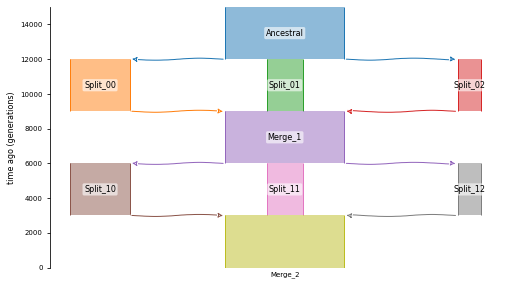

In [87]:
cake = model.cake_model(Ns=[N,N,N],splits = [3,3],proportions=[[1/2,0.3,0.2],[1/2,0.3,0.2]],migration_rate=0,time_period_merge=[time_period,time_period,time_period],time_period_splits=[time_period,time_period],yaml_filename="../yaml_files/nonsymmetric_3tier_503020_nomigration.yaml",plot_filename="../Figures/nonsymmetric_cake/nonsymmetric_3tier_503020_nomigration")

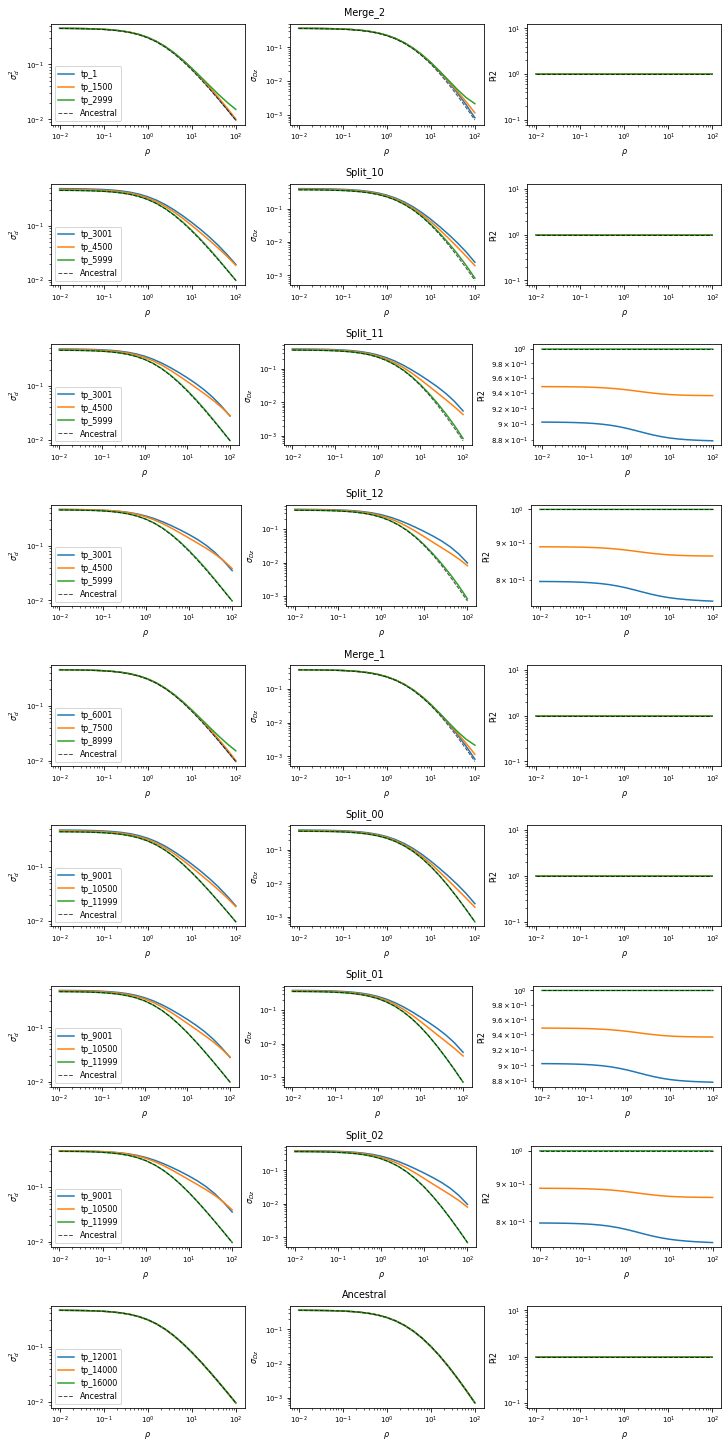

In [88]:
# Slice
times,times_dic = slice.sample_timepoints(cake)
sliced_dict = slice.slice_timepoints(cake,times,yaml_filename="../yaml_files/nonsymmetric_3tier_503020_nomigration")
# Compute LD
LD_dict = get_LD.get_LD_from_sliced_demes(sliced_dict)
#Plot LD
rhos = np.logspace(-2, 2, 21)
plot_LD.plot_LD(LD_dict,times_dic,LD_dict['Ancestral'][0],rhos,plot_file="../Figures/nonsymmetric_cake/nonsymmetric_3tier_503020_LD_nomigration.svg")

In [63]:
def plot_LD_Linear(LD_sigma, times_dic, ancestral, rhos = np.logspace(-2, 2, 21), plot_file = None, figsize = (10,20)):
    fig = plt.figure(constrained_layout=True, figsize = figsize)
    subfigs = fig.subfigures(nrows=len(LD_sigma.keys()), ncols=1)

    for pop,subfig in zip(LD_sigma,subfigs):
        subfig.suptitle(pop)
        (ax1, ax2, ax3) = subfig.subplots(nrows=1, ncols=len(LD_sigma[pop]))
        for time_point in range(len(LD_sigma[pop])):
            ax1.plot(rhos, LD_sigma[pop][time_point][:, 0]/ancestral[:, 0],label=str("tp_"+str(times_dic[pop][time_point])))
            ax2.plot(rhos, LD_sigma[pop][time_point][:, 1]/ancestral[:, 1],label=str("tp_"+str(times_dic[pop][time_point])))
            ax3.plot(rhos, LD_sigma[pop][time_point][:, 2]/ancestral[:, 2],label=str("tp_"+str(times_dic[pop][time_point])))
        
        ax1.plot(rhos, ancestral[:, 0]/ancestral[:, 0],'k--',label="Ancestral",linewidth = 1,alpha = 0.7)
        ax2.plot(rhos, ancestral[:, 1]/ancestral[:, 1],'k--',label="Ancestral",linewidth = 1,alpha = 0.7)
        ax3.plot(rhos, ancestral[:, 2]/ancestral[:, 2],'k--',label="Ancestral",linewidth = 1,alpha = 0.7)
    
        # ax1.set_yscale("log")
        # ax2.set_yscale("log")
        # ax3.set_yscale("log")
        ax1.set_xscale("log")
        ax2.set_xscale("log")
        ax3.set_xscale("log")
        ax1.set_xlabel(r"$\rho$")
        ax2.set_xlabel(r"$\rho$")
        ax3.set_xlabel(r"$\rho$")
        ax1.set_ylabel(r"$\sigma_d^2$")
        ax2.set_ylabel(r"$\sigma_{Dz}$")
        ax3.set_ylabel(r"Pi2")

        ax1.legend()
        #ax2.legend()
        #ax3.legend()
    if plot_file != None :
        plt.savefig(plot_file,format='svg',transparent = False)



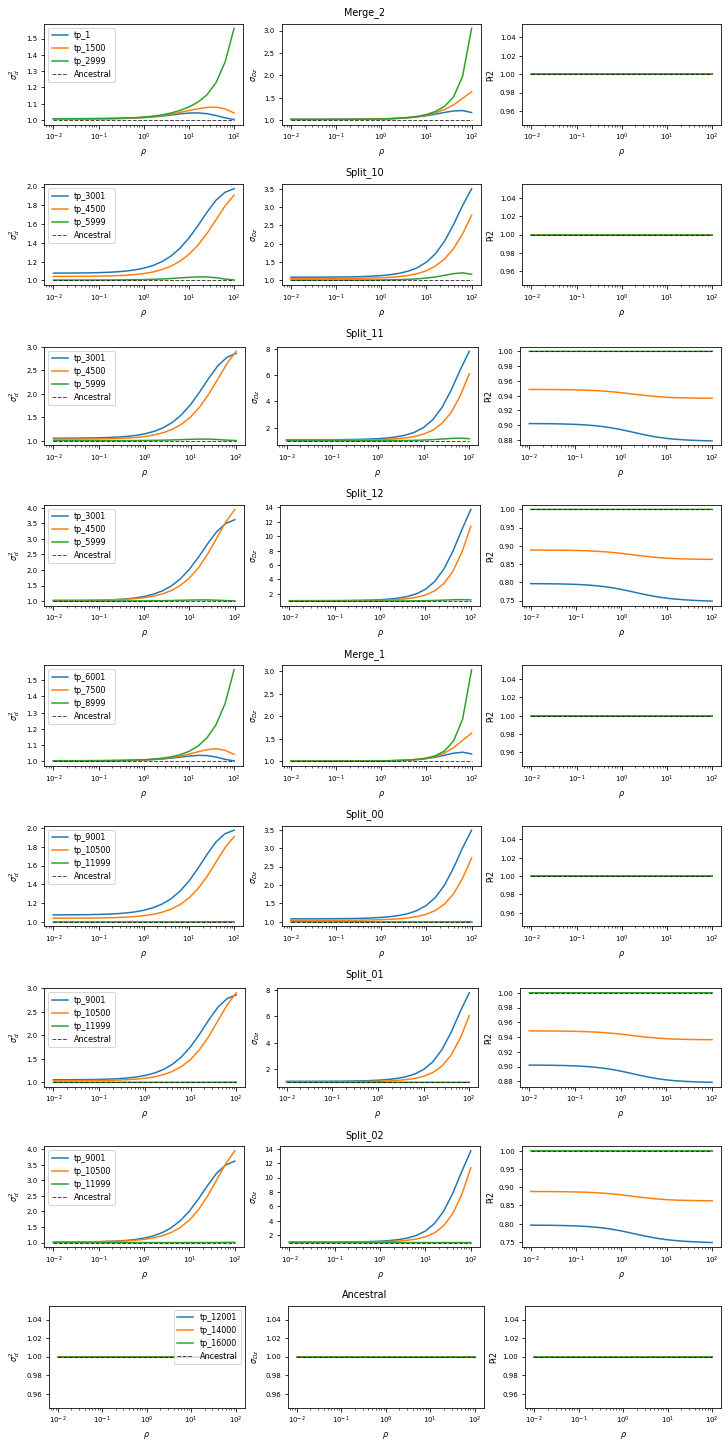

In [64]:
plot_LD_Linear(LD_dict,times_dic,LD_dict['Ancestral'][0],rhos,plot_file="../Figures/nonsymmetric_cake/nonsymmetric_3tier_503020_LD_nomigration_linear.svg")

### Without migration, shorter period

[Split(parent='Ancestral', children=['Split_01', 'Split_02', 'Split_00'], time=49500.0), Split(parent='Merge_1', children=['Split_10', 'Split_11', 'Split_12'], time=45000.0)]


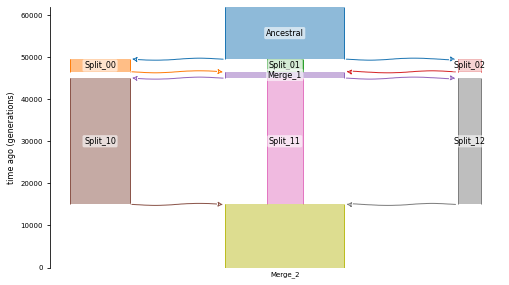

In [103]:
N = 30e3
cake = model.cake_model(Ns=[N,N,N],splits = [3,3],proportions=[[1/2,0.3,0.2],[1/2,0.3,0.2]],migration_rate=0,time_period_merge=[time_period,0.05*N,0.5*N],time_period_splits=[0.1*N,N],plot_filename="../Figures/nonsymmetric_cake/nonsymmetric_3tier_503020_times_nomigration")

In [109]:

# Slice
times,times_dic = slice.sample_timepoints(cake,time_points_perdeme=5)
sliced_dict = slice.slice_timepoints(cake,times)
# Compute LD
LD_dict = get_LD.get_LD_from_sliced_demes(sliced_dict)


In [113]:
times_dic

defaultdict(None,
            {'Ancestral': array([49501, 50500, 51500, 52500, 53500]),
             'Split_00': array([46501, 47250, 48000, 48749, 49499]),
             'Split_01': array([46501, 47250, 48000, 48749, 49499]),
             'Split_02': array([46501, 47250, 48000, 48749, 49499]),
             'Merge_1': array([45001, 45375, 45750, 46124, 46499]),
             'Split_10': array([15001, 22500, 30000, 37499, 44999]),
             'Split_11': array([15001, 22500, 30000, 37499, 44999]),
             'Split_12': array([15001, 22500, 30000, 37499, 44999]),
             'Merge_2': array([    1,  3750,  7500, 11249, 14999])})

In [115]:
len(LD_dict['Merge_2'])

5

In [118]:
def plot_LD(LD_sigma, times_dic, ancestral, rhos = np.logspace(-2, 2, 21), plot_file = None, figsize = (10,20)):
    fig = plt.figure(constrained_layout=True, figsize = figsize)
    subfigs = fig.subfigures(nrows=len(LD_sigma.keys()), ncols=1)

    for pop,subfig in zip(LD_sigma,subfigs):
        subfig.suptitle(pop)
        (ax1, ax2, ax3) = subfig.subplots(nrows=1, ncols=3)
        for time_point in range(len(LD_sigma[pop])):
            ax1.plot(rhos, LD_sigma[pop][time_point][:, 0],label=str("tp_"+str(times_dic[pop][time_point])))
            ax2.plot(rhos, LD_sigma[pop][time_point][:, 1],label=str("tp_"+str(times_dic[pop][time_point])))
            ax3.plot(rhos, LD_sigma[pop][time_point][:, 2],label=str("tp_"+str(times_dic[pop][time_point])))
        
        ax1.plot(rhos, ancestral[:, 0],'k--',label="Ancestral",linewidth = 1,alpha = 0.7)
        ax2.plot(rhos, ancestral[:, 1],'k--',label="Ancestral",linewidth = 1,alpha = 0.7)
        ax3.plot(rhos, ancestral[:, 2],'k--',label="Ancestral",linewidth = 1,alpha = 0.7)
    
        ax1.set_yscale("log")
        ax2.set_yscale("log")
        ax3.set_yscale("log")
        ax1.set_xscale("log")
        ax2.set_xscale("log")
        ax3.set_xscale("log")
        ax1.set_xlabel(r"$\rho$")
        ax2.set_xlabel(r"$\rho$")
        ax3.set_xlabel(r"$\rho$")
        ax1.set_ylabel(r"$\sigma_d^2$")
        ax2.set_ylabel(r"$\sigma_{Dz}$")
        ax3.set_ylabel(r"Pi2")

        ax1.legend()
        #ax2.legend()
        #ax3.legend()
    if plot_file != None :
        plt.savefig(plot_file,format='pdf',transparent = False)


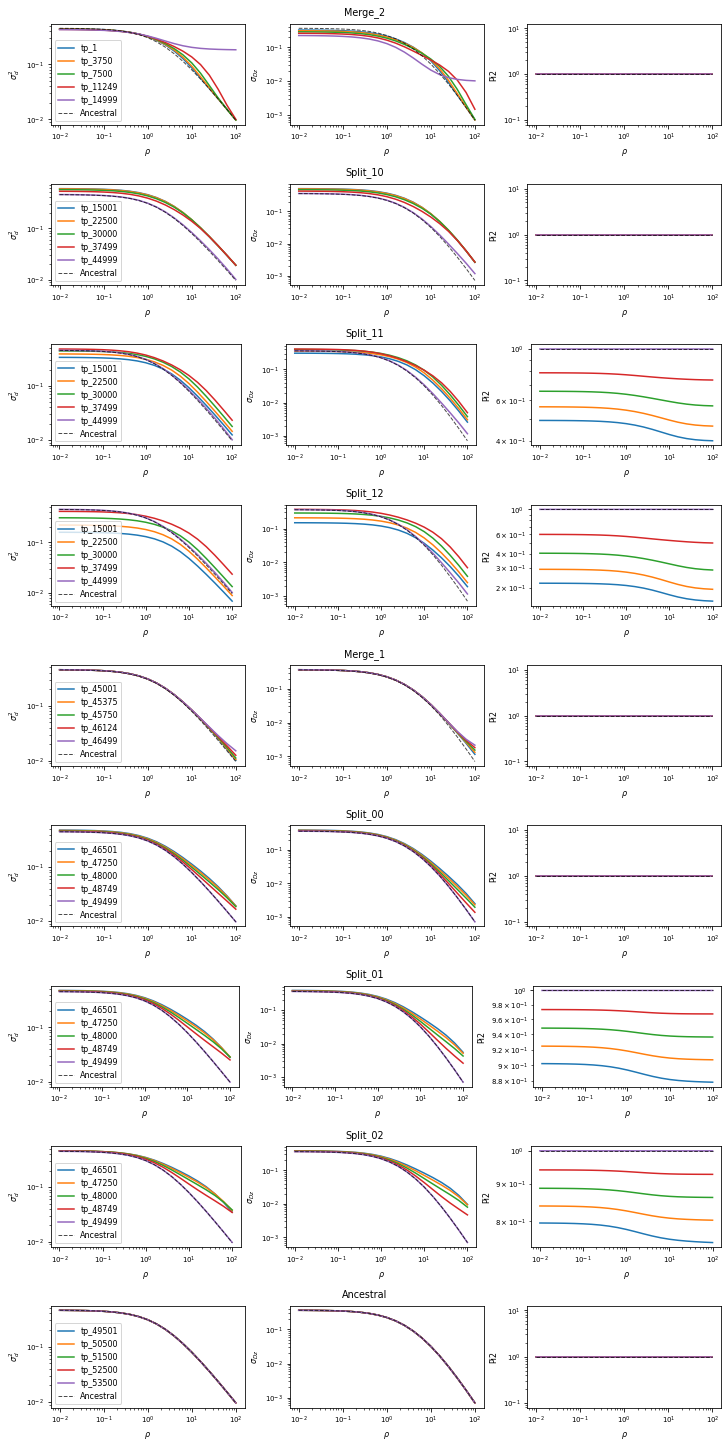

In [119]:
#Plot LD
rhos = np.logspace(-2, 2, 21)
plot_LD(LD_dict,times_dic,LD_dict['Ancestral'][0],rhos,plot_file="../Figures/nonsymmetric_cake/nonsymmetric_3tier_503020_LD_times_nomigration.pdf")

### Get IIRC curve

In [45]:
import msprime as ms

In [89]:
m = ms.Demography.from_demes(cake)
debug = m.debug()

In [90]:
debug

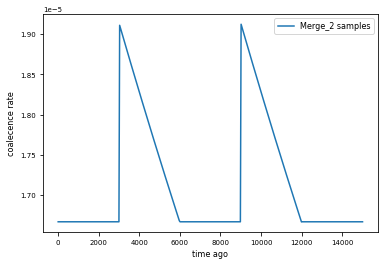

In [101]:

T = np.concatenate([
    np.linspace(0, 1000, 2001),
    np.linspace(1000, 1.5e4, 401)[1:]
])

R, _ = debug.coalescence_rate_trajectory(T, {"Merge_2": 2})

plt.plot(T, R, label="Merge_2 samples")
plt.legend()
plt.xlabel("time ago")
plt.ylabel("coalecence rate");

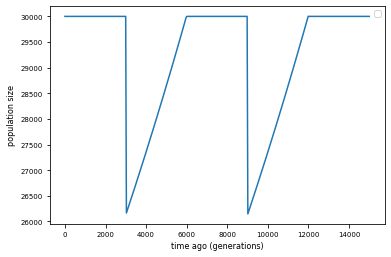

In [102]:

plt.plot(T, 1/(2*R))
plt.legend()
plt.xlabel("time ago (generations)")
plt.ylabel("population size");


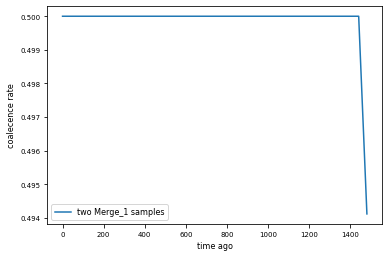

In [49]:

T = np.linspace(0, 2000, 51)
RAA, _ = debug.coalescence_rate_trajectory(T, {"Merge_1": 2})

plt.plot(T, RAA, label="two Merge_1 samples")
plt.legend()
plt.xlabel("time ago")
plt.ylabel("coalecence rate");